In [372]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

In [373]:
#reads training data set images to matrix 
def readTrainingImages():
    
    mat = np.zeros((2400,784))
    for x in range(1,2400):
        image = plt.imread('/Users/heba/Desktop/ML/Assignment 2/Train/'+ str(x) +'.jpg')
        array = np.array(image)
        flatarray = array.flatten()
        mat[x,:] = np.array(flatarray)
    return mat

In [374]:
Xmatrix = readTrainingImages()#This would be the X matrix each row is an image (2400x785)
XNaiveTrain = Xmatrix

In [375]:
#Add a colomn of 1s
ones = np.ones((2400,1))

In [376]:
XNew = np.hstack((Xmatrix,ones)) #X tilda with an extra column of ones
#input images X with a column of 1s
XNew[0].shape

(785,)

In [377]:
#initializing training label vectors to contain all ones
T0ones = np.ones((2400,1))
T1ones = np.ones((2400,1))
T2ones = np.ones((2400,1))
T3ones = np.ones((2400,1))
T4ones = np.ones((2400,1))
T5ones = np.ones((2400,1))
T6ones = np.ones((2400,1))
T7ones = np.ones((2400,1))
T8ones = np.ones((2400,1))
T9ones = np.ones((2400,1))

In [378]:
#initializing training label vectors to contain all neg ones
T0 = T0ones * -1 
T1 = T1ones * -1 
T2 = T2ones * -1 
T3 = T3ones * -1 
T4 = T4ones * -1 
T5 = T5ones * -1 
T6 = T6ones * -1 
T7 = T7ones * -1 
T8 = T8ones * -1 
T9 = T9ones * -1 

In [379]:
#updating the values of training label vectors to their correct values 
LabelTxtFile = open("/Users/heba/Desktop/ML/Assignment 2/Train/Training Labels.txt", "r")
count=0
for x in LabelTxtFile:
    x = int(x)
    if(x==0):
        T0[count] = 1
    elif(x==1):
        T1[count] = 1
    elif(x==2):
        T2[count] = 1
    elif(x==3):
        T3[count] = 1
    elif(x==4):
        T4[count] = 1
    elif(x==5):
        T5[count] = 1
    elif(x==6):
        T6[count] = 1
    elif(x==7):
        T7[count] = 1
    elif(x==8):
        T8[count] = 1
    elif(x==9):    
        T9[count] = 1
    
    count+=1

In [380]:
#Labels of training dataset
T = np.array([T0, T1, T2, T3, T4, T5, T6, T7, T8, T9])
T[0][0][0]

1.0

In [381]:
#reading Test data
def readTestImages():
    
    mat2 = np.zeros((200,784))
    for x in range(1,201):
        image2 = plt.imread('/Users/heba/Desktop/ML/Assignment 2/Test/'+ str(x) +'.jpg')
        array2 = np.array(image2)
        flatarray2 = array2.flatten()
        mat2[x-1,:] = np.array(flatarray2)
        
    return mat2

In [382]:
#matrix where each row correspond to an image of the test set
XmatrixTest = readTestImages()
XNaiveTest = XmatrixTest
ones2 = np.ones((200,1))
XNewTest = np.hstack((XmatrixTest,ones2))

In [383]:
#Read test data labels
LabelTxtFile2 = open("/Users/heba/Desktop/ML/Assignment 2/Test/Test Labels.txt", "r")
count=0
testLabels = np.ones((200,1))
for x in LabelTxtFile2:
    x = int(x)
    testLabels[count] = x
    count+=1

In [384]:
#initialize weight vector as per Question 1 
def initializeWeight():
        W0 = np.zeros((785,1))
        W0[0] = 1

        W1 = np.zeros((785,1))
        W1[0] = 1

        W2 = np.zeros((785,1))
        W2[0] = 1

        W3 = np.zeros((785,1))
        W3[0] = 1

        W4 = np.zeros((785,1))
        W4[0] = 1

        W5 = np.zeros((785,1))
        W5[0] = 1

        W6 = np.zeros((785,1))
        W6[0] = 1

        W7 = np.zeros((785,1))
        W7[0] = 1

        W8 = np.zeros((785,1))
        W8[0] = 1

        W9 = np.zeros((785,1))
        W9[0] = 1

        W = np.array([W0, W1, W2, W3, W4, W5, W6, W7, W8, W9])
        
        return W


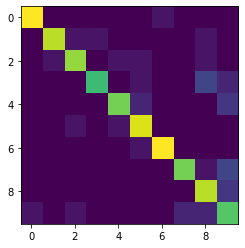

Accuracy of n = 1: 81.5


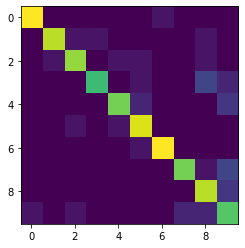

Accuracy of n = 0.1: 81.5


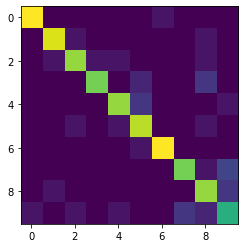

Accuracy of n = 0.001: 81.5


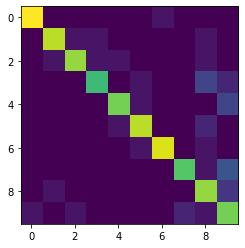

Accuracy of n = 0.0001: 80.0


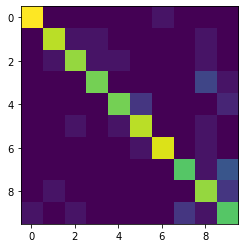

Accuracy of n = 1e-05: 80.5


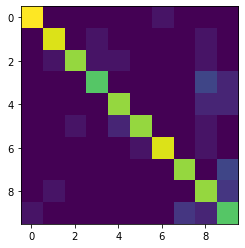

Accuracy of n = 1e-06: 81.5


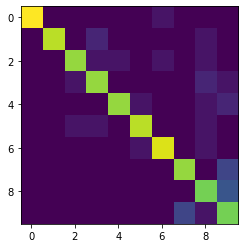

Accuracy of n = 1e-07: 82.5


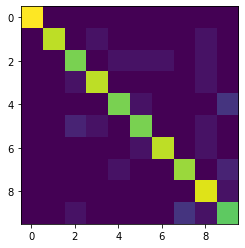

Accuracy of n = 1e-08: 86.5


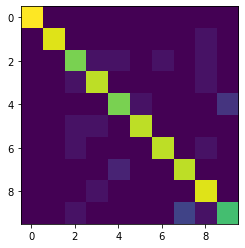

Accuracy of n = 1e-09: 88.0


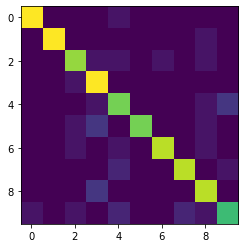

Accuracy of n = 1e-10: 83.5


In [386]:
#Question 1 perceptron algorithm, prints confusion matrix and accuracies
nAll = [1, 0.1, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0.000000001, 0.0000000001]

for n in range(len(nAll)):
    W = initializeWeight()
    for c in range(10):
        for e in range(500):
            for x in range(len(XNew)):

                p = np.dot(W[c].reshape(785), XNew[x])

                if(p >= 0):
                    p = 1.0
                else:
                    p = -1.0

                if(p != T[c][x][0]):
                    W[c]= W[c] + nAll[n] * T[c][x][0] * XNew[x].reshape(785,1)

    Prediction0 = np.matmul(XNewTest, W[0])  
    Prediction1 = np.matmul(XNewTest, W[1])
    Prediction2 = np.matmul(XNewTest, W[2])
    Prediction3 = np.matmul(XNewTest, W[3])
    Prediction4 = np.matmul(XNewTest, W[4])
    Prediction5 = np.matmul(XNewTest, W[5])
    Prediction6 = np.matmul(XNewTest, W[6])
    Prediction7 = np.matmul(XNewTest, W[7])
    Prediction8 = np.matmul(XNewTest, W[8])
    Prediction9 = np.matmul(XNewTest, W[9])


    maximumTargetValue = 0
    predictionLabels = np.ones((200,1))
    for x in range(200):
        maximumTargetValue = np.argmax([Prediction0[x],Prediction1[x],Prediction2[x],Prediction3[x],Prediction4[x],Prediction5[x],Prediction6[x],Prediction7[x],Prediction8[x],Prediction9[x]])
        predictionLabels[x] = maximumTargetValue          

    confusionMatrix = compute_confusion_matrix(testLabels,predictionLabels)
    
    plt.imshow(confusionMatrix, interpolation='nearest')

    plt.savefig('Confusion' + str(n) + '.jpg',bbox_inches='tight')
    plt.show()
                
    accuracyPerceptron = (np.trace(confusionMatrix)/200) * 100
    print("Accuracy of n = " + str(nAll[n]) + ": "+ str(accuracyPerceptron))        

In [248]:
#Question 2: Naiive Bayes

#divide all pixels by 255
XNaiveTrainNew = XNaiveTrain / 255
XNaiveTestNew = XNaiveTest / 255

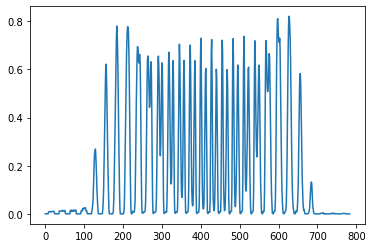

In [309]:
#Calculate mean vectors that contain the mean values of each feature in each class
Mean0 = np.mean(XNaiveTrainNew[0:240], axis = 0)
Mean1 = np.mean(XNaiveTrainNew[240:480], axis = 0)
Mean2 = np.mean(XNaiveTrainNew[480:720], axis = 0)
Mean3 = np.mean(XNaiveTrainNew[720:960], axis = 0)
Mean4 = np.mean(XNaiveTrainNew[960:1200], axis = 0)
Mean5 = np.mean(XNaiveTrainNew[1200:1440], axis = 0)
Mean6 = np.mean(XNaiveTrainNew[1440:1680], axis = 0)
Mean7 = np.mean(XNaiveTrainNew[1680:1920], axis = 0)
Mean8 = np.mean(XNaiveTrainNew[1920:2160], axis = 0)
Mean9 = np.mean(XNaiveTrainNew[2160:], axis = 0)

plt.plot(Mean0)

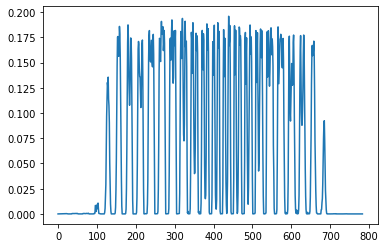

In [310]:
#Calculate variance vectors that contain the variance values of each feature in each class
V0 = np.std(XNaiveTrainNew[0:240], axis = 0) ** 2
V1 = np.std(XNaiveTrainNew[240:480], axis = 0) ** 2
V2 = np.std(XNaiveTrainNew[480:720], axis = 0) ** 2
V3 = np.std(XNaiveTrainNew[720:960], axis = 0) ** 2
V4 = np.std(XNaiveTrainNew[960:1200], axis = 0) ** 2
V5 = np.std(XNaiveTrainNew[1200:1440], axis = 0) ** 2
V6 = np.std(XNaiveTrainNew[1440:1680], axis = 0) ** 2
V7 = np.std(XNaiveTrainNew[1680:1920], axis = 0) ** 2
V8 = np.std(XNaiveTrainNew[1920:2160], axis = 0) ** 2
V9 = np.std(XNaiveTrainNew[2160:], axis = 0) ** 2

plt.plot(V0)

In [293]:
#Checks if variance values 
for x in range(len(V0)):
    if(V0[x]<0.01):
        V0[x] = 0.01
    if(V1[x]<0.01):
        V1[x] = 0.01
    if(V2[x]<0.01):
        V2[x] = 0.01
    if(V3[x]<0.01):
        V3[x] = 0.01
    if(V4[x]<0.01):
        V4[x] = 0.01
    if(V5[x]<0.01):
        V5[x] = 0.01
    if(V6[x]<0.01):
        V6[x] = 0.01
    if(V7[x]<0.01):
        V7[x] = 0.01
    if(V8[x]<0.01):
        V8[x] = 0.01
    if(V9[x]<0.01):
        V9[x] = 0.01
        

In [370]:

Mean = np.array([Mean0, Mean1, Mean2, Mean3, Mean4, Mean5, Mean6, Mean7, Mean8, Mean9])
V = np.array([V0, V1, V2, V3, V4, V5, V6, V7, V8, V9])

In [325]:
def Gauss(x, Mean, V):
    return (1/np.sqrt(2 * np.pi * V)) * (np.exp((-(np.power((x-Mean),2))/(2*V))))

In [351]:
gaussianArray = np.zeros((200,10))

for x in range(200):
    temp = []
    for c in range(0,10):
        G = Gauss(XNaiveTestNew[x],Mean[c],V[c]) #gaussian of image x, classifier c
        temp = np.append(temp,np.prod(G))
   # np.vstack([gaussianArray,temp])
    gaussianArray[x] = temp

In [361]:
gaussianArray

array([[1.39251309e+085, 0.00000000e+000, 1.14077794e-096, ...,
        6.53727468e-233, 0.00000000e+000, 0.00000000e+000],
       [6.38972272e+209, 0.00000000e+000, 1.39169377e+099, ...,
        0.00000000e+000, 5.80849599e+085, 2.19001911e-140],
       [7.85480166e+196, 0.00000000e+000, 1.01696045e-136, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [9.08188191e-001, 0.00000000e+000, 2.57998000e-015, ...,
        4.18832534e-028, 6.30537550e-139, 1.26018895e-033],
       [1.88904338e+002, 7.52949002e-035, 1.20011313e+048, ...,
        7.64650209e+246, 1.22889048e+159, 1.85571257e+267],
       [2.80296973e+038, 7.40009724e-184, 4.29331760e+092, ...,
        2.20286717e+217, 3.49452694e+160, 6.72898753e+268]])

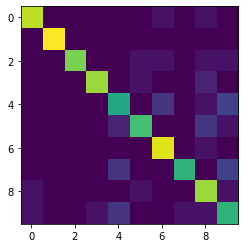

In [367]:
maximumTargetValue = 0
predictionLabels = np.ones((200,1))
for x in range(200):
    maximumTargetValue = np.argmax([gaussianArray[x][0],gaussianArray[x][1],gaussianArray[x][2],gaussianArray[x][3],gaussianArray[x][4],gaussianArray[x][5],gaussianArray[x][6],gaussianArray[x][7],gaussianArray[x][8],gaussianArray[x][9]])
    predictionLabels[x] = maximumTargetValue          

confusionMatrix = compute_confusion_matrix(testLabels,predictionLabels)

plt.imshow(confusionMatrix, interpolation='nearest')

plt.savefig('Confusion-Gauss.jpg',bbox_inches='tight')
plt.show()

In [368]:
confusionMatrix

array([[18.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.],
       [ 0., 20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 16.,  0.,  0.,  1.,  1.,  0.,  1.,  1.],
       [ 0.,  0.,  0., 17.,  0.,  1.,  0.,  0.,  2.,  0.],
       [ 0.,  0.,  0.,  0., 12.,  0.,  3.,  0.,  1.,  4.],
       [ 0.,  0.,  0.,  0.,  2., 14.,  0.,  0.,  3.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 19.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  3.,  0.,  0., 13.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0., 17.,  1.],
       [ 1.,  0.,  0.,  1.,  3.,  0.,  0.,  1.,  1., 13.]])

In [369]:
accuracyNaiiveBayes = (np.trace(confusionMatrix)/200) * 100
accuracyNaiiveBayes

79.5